# 猫狗识别 V1

## 数据预处理

### 准备数据

In [1]:
import os, shutil

# 原始数据集解压目录的路径
original_dataset_dir = './dataset/all/train'

# 保存较小的数据集目录
base_dir = './dataset/cats_and_dogs_small'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

# 训练数据目录
train_dir = os.path.join(base_dir,'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)

# 验证数据目录
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)

# 测试数据目录
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

# 猫的训练图像目录
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

# 狗的训练图像目录
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

# 猫的验证图像目录
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

# 狗的验证图像目录
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

# 猫的测试集图像目录
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

# 狗的测试图像目录
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)


将前1000张**猫**的图像复制到train_cats_dir中

In [2]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

将接下来的500张猫的图像复制到validation_cats_dir中

In [3]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

将接下来的500张猫的图像复制到test_cats_dir中

In [4]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

将前1000张**狗**的图像复制到train_dogs_dir中

In [5]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

将接下来的500张狗的图像复制到validaiton_dogs_fir中

In [6]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

将接下来的500张狗的图像复制到test_dogs_dir中

In [7]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

查看每个分组(训练/验证/测试)中分别包含多少张图像

In [8]:
print('total training cat images: ', len(os.listdir(train_cats_dir)))


total training cat images:  1000


In [9]:
print('total training dog images: ', len(os.listdir(train_dogs_dir)))

total training dog images:  1000


In [10]:
print('total validation cat images: ', len(os.listdir(validation_cats_dir)))

total validation cat images:  500


## 训练模型

### 将猫狗分类问题的小型卷积神经网络实例化

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))         
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

Using TensorFlow backend.


In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)       147584    
__________

### 配置模型用于训练

In [29]:
from keras import optimizers

In [30]:
model.compile(optimizer = optimizers.RMSprop(lr=1e-4),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])


### 数据预处理

* 读取图像文件
* 将JEPG文件解码为RGB像素网格
* 将这些像素网格转换称浮点数张量
* 将像素值(0~255范围内)缩放到[0-1]区间内

### 使用ImageDataGenerator从目录中读取图像

In [12]:
from keras.preprocessing.image import ImageDataGenerator

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 将目标目录下的所有图像的大小调整为150x150
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150, 150),
                                                    batch_size = 20,
                                                    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size = (150, 150),
                                                        batch_size = 20,
                                                        class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [33]:
for data_batch, label_batch in train_generator:
    print("data batch_shape: ", data_batch.shape)
    print("label batch_shape: ", label_batch.shape)
    break

data batch_shape:  (20, 150, 150, 3)
label batch_shape:  (20,)


### 使用批量生成器拟合模型

In [34]:
history = model.fit_generator(train_generator,
                              steps_per_epoch = 100,
                              epochs = 30,
                              validation_data = validation_generator,
                              validation_steps = 50)

Epoch 1/30
100/100 [==============================] - 86s 856ms/step - loss: 0.6910 - acc: 0.5475 - val_loss: 0.6737 - val_acc: 0.5970
Epoch 2/30
100/100 [==============================] - 78s 784ms/step - loss: 0.6535 - acc: 0.6155 - val_loss: 0.6555 - val_acc: 0.5960
Epoch 3/30
100/100 [==============================] - 79s 788ms/step - loss: 0.6134 - acc: 0.6585 - val_loss: 0.6151 - val_acc: 0.6490
Epoch 4/30
100/100 [==============================] - 90s 896ms/step - loss: 0.5696 - acc: 0.6935 - val_loss: 0.6310 - val_acc: 0.6530
Epoch 5/30
100/100 [==============================] - 81s 809ms/step - loss: 0.5482 - acc: 0.7180 - val_loss: 0.5822 - val_acc: 0.6740
Epoch 6/30
100/100 [==============================] - 77s 775ms/step - loss: 0.5207 - acc: 0.7380 - val_loss: 0.5612 - val_acc: 0.7030
Epoch 7/30
100/100 [==============================] - 77s 774ms/step - loss: 0.4963 - acc: 0.7590 - val_loss: 0.5623 - val_acc: 0.7010
Epoch 8/30
100/100 [==============================] - 7

**在训练完成后保存模型**

In [35]:
model.save('cats_and_dogs_small_1.h5')

### 绘制训练过程中的损失曲线和精度曲线

In [14]:
import matplotlib.pyplot as plt

history_list = history.history
acc = history_list['acc']
val_acc = history_list['val_acc']
loss = history_list['loss']
val_loss = history_list['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Valadation acc')
plt.title('Training and Validaiton Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

NameError: name 'history' is not defined

## 优化模型

### 使用数据增强

数据增强是从现有的训练样本中生成更多的训练数据,其方法是利用多种能够生成的可信图像的随机变化来**增加(augment)**样本.

其目标是,模型在训练时不会两次查看完全相同的图像.这让模型能够观察到数据的更多内容,从而具有更好的泛化能力.



#### 利用ImageDataGenerator设置数据增强

In [15]:
datagen = ImageDataGenerator(rotation_range = 40,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             fill_mode = 'nearest')

#### 显示几个随机增强后的训练图像

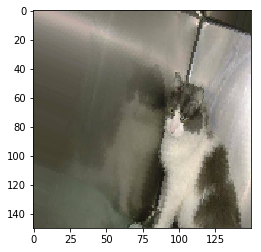

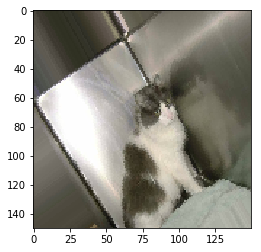

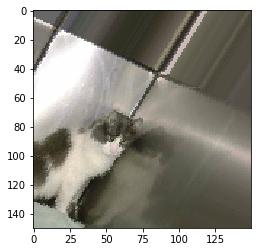

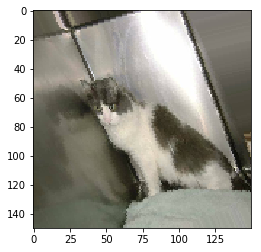

In [16]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# 选择一张图像
img_path = fnames[3]

#读取图像并调整大小
img = image.load_img(img_path, target_size = (150, 150))

#将其转换成形状(150, 150, 3)的Numpy数组
x = image.img_to_array(img)

#将其形状改变为(1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i = i + 1
    if i % 4 == 0:
        break
        
plt.show()

#### 定义一个包含dropout的新卷积神经网络

In [17]:
from keras import optimizers

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = optimizers.RMSprop(lr = 1e-4),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])


In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [22]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model1.png',show_shapes=True)

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

#### 利用数据增强生成器训练网络

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50)

### 使用与训练的卷积神经网络

想要将深度学习应用与小型图像数据集,一种常用且非常高校的方法是使用预训练网络.

预训练网络(pretrained network)是一个保存我好的网络,之前已在大型数据集(通常是大规模图像分类任务上训练好).

如果这个原始数据集足够大且足够通用,那么预训练网络学到的特征的空间层级结构可以有效地作为世界的通用模型,因此这些特征可用于各种不同的计算机视觉问题.



使用预训练网络有两张方法:**特征提取**(feature extraction)和**微调模型**(fine tuning).

In [ ]:
from keras.application